Multiclass Image Classification using CNN (KERAS)

Step 1. Load data directory from Kaggle using API

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "sivasoruby" # username from the json file
os.environ['KAGGLE_KEY'] = "121f4f644d96316c4b7379f69b4e5959" # key from the json file

In [2]:
!kaggle datasets download -d vijaygiitk/multiclass-weather-dataset

Dataset URL: https://www.kaggle.com/datasets/vijaygiitk/multiclass-weather-dataset
License(s): CC0-1.0
 99% 133M/134M [00:08<00:00, 20.3MB/s]
100% 134M/134M [00:08<00:00, 16.2MB/s]


In [3]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/multiclass-weather-dataset.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


Step 2. Exploratory Data Analysis (EDA)

In [4]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/dataset')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/dataset"))
file_count = len(files)
# print(file_count)

['shine', 'sunrise', 'cloudy', 'alien_test', 'rainy', 'foggy', 'test.csv']


In [5]:
# Make new base directory
original_dataset_dir = '/content/dataset'
base_dir = '/content/weather-data/'
os.mkdir(base_dir)

In [6]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Under train folder create five folders
# (cloud, folly, rainy, shine, sunrise)

train_cloud_dir = os.path.join(train_dir, 'cloudy')
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'foggy')
os.mkdir(train_foggy_dir)

train_rainy_dir = os.path.join(train_dir, 'rainy')
os.mkdir(train_rainy_dir)

train_shine_dir = os.path.join(train_dir, 'shine')
os.mkdir(train_shine_dir)

train_sunrise_dir = os.path.join(train_dir, 'sunrise')
os.mkdir(train_sunrise_dir)

#Under validation folder create five folders
# (cloud, folly, rainy, shine, sunrise)

validation_cloud_dir = os.path.join(validation_dir, 'cloudy')
os.mkdir(validation_cloud_dir)

validation_foggy_dir = os.path.join(validation_dir, 'foggy')
os.mkdir(validation_foggy_dir)

validation_rainy_dir = os.path.join(validation_dir, 'rainy')
os.mkdir(validation_rainy_dir)

validation_shine_dir = os.path.join(validation_dir, 'shine')
os.mkdir(validation_shine_dir)

validation_sunrise_dir = os.path.join(validation_dir, 'sunrise')
os.mkdir(validation_sunrise_dir)

In [7]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [8]:
CLOUDY_SOURCE_DIR = '/content/dataset/cloudy/'
TRAINING_CLOUDY_DIR = '/content/weather-data/train/cloudy/'
VALID_CLOUDY_DIR = '/content/weather-data/validation/cloudy/'

FOGGY_SOURCE_DIR = '/content/dataset/foggy/'
TRAINING_FOGGY_DIR = '/content/weather-data/train/foggy/'
VALID_FOGGY_DIR = '/content/weather-data/validation/foggy/'

RAINY_SOURCE_DIR = '/content/dataset/rainy/'
TRAINING_RAINY_DIR = '/content/weather-data/train/rainy/'
VALID_RAINY_DIR = '/content/weather-data/validation/rainy/'

SHINE_SOURCE_DIR = '/content/dataset/shine/'
TRAINING_SHINE_DIR = '/content/weather-data/train/shine/'
VALID_SHINE_DIR = '/content/weather-data/validation/shine/'

SUNRISE_SOURCE_DIR = '/content/dataset/sunrise/'
TRAINING_SUNRISE_DIR = '/content/weather-data/train/sunrise/'
VALID_SUNRISE_DIR = '/content/weather-data/validation/sunrise/'

In [9]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(CLOUDY_SOURCE_DIR, TRAINING_CLOUDY_DIR, VALID_CLOUDY_DIR, split_size)
split_data(FOGGY_SOURCE_DIR, TRAINING_FOGGY_DIR, VALID_FOGGY_DIR, split_size)
split_data(RAINY_SOURCE_DIR, TRAINING_RAINY_DIR, VALID_RAINY_DIR, split_size)
split_data(SHINE_SOURCE_DIR, TRAINING_SHINE_DIR, VALID_SHINE_DIR, split_size)
split_data(SUNRISE_SOURCE_DIR, TRAINING_SUNRISE_DIR, VALID_SUNRISE_DIR, split_size)

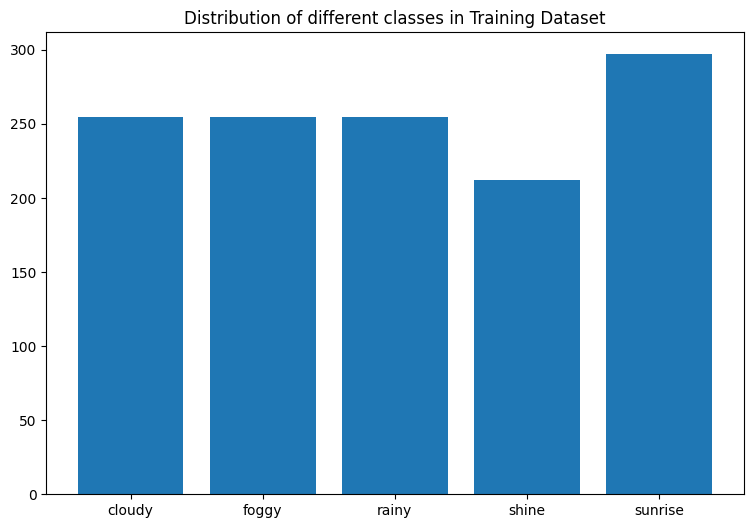

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/weather-data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [11]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/weather-data/train/'+i+'/'))))

Training cloudy images are: 255
Training foggy images are: 255
Training rainy images are: 255
Training shine images are: 212
Training sunrise images are: 297


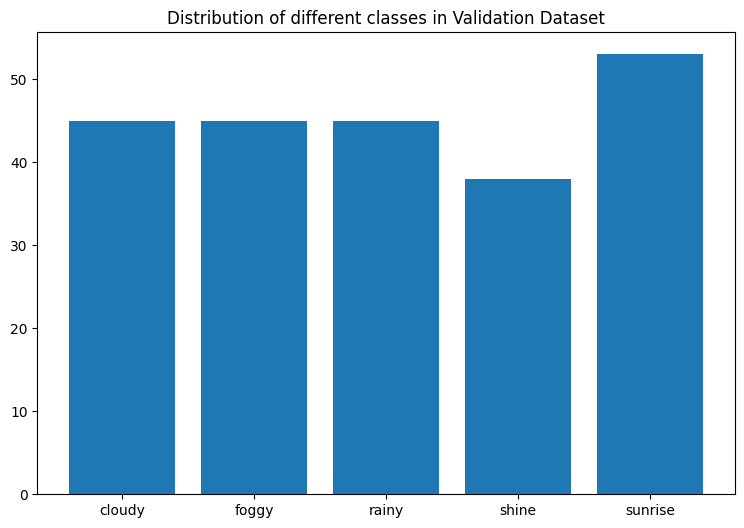

In [12]:
image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/weather-data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [13]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('/content/weather-data/validation/'+i+'/'))))

Valid cloudy images are: 45
Valid foggy images are: 45
Valid rainy images are: 45
Valid shine images are: 38
Valid sunrise images are: 53


Step 3. Deep Learning with Data Augumentation

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [15]:
img_width=256; img_height=256
batch_size=16

In [16]:
TRAINING_DIR = '/content/weather-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1274 images belonging to 5 classes.


In [17]:
VALIDATION_DIR = '/content/weather-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 226 images belonging to 5 classes.


In [18]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.keras'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [19]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 58, 58, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 27, 27, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 25, 25, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,202,661 (12.22 MB)

 Trainable params: 3,202,661 (12.22 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

In [21]:
history = model.fit(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 58s 552ms/step - accuracy: 0.2493 - loss: 1.5977 - val_accuracy: 0.1991 - val_loss: 1.6079
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 294ms/step - accuracy: 0.2711 - loss: 1.5218 - val_accuracy: 0.3496 - val_loss: 1.4330
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 50s 405ms/step - accuracy: 0.3589 - loss: 1.3947 - val_accuracy: 0.4602 - val_loss: 1.0999
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 302ms/step - accuracy: 0.4138 - loss: 1.2465 - val_accuracy: 0.4558 - val_loss: 1.1111
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 302ms/step - accuracy: 0.3996 - loss: 1.2111 - val_accuracy: 0.4735 - val_loss: 1.1025
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 26s 309ms/step - accuracy: 0.4464 - loss: 1.1811 - val_accuracy: 0.4425 - val_loss: 1.2356
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 28s 329ms/step - accuracy: 0.4383 - loss: 1.1947 - val_accuracy: 0.5088 - val_loss: 1.1210
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 26s 301ms/step - accuracy: 0.4426 - loss: 1.1533 - val_accu

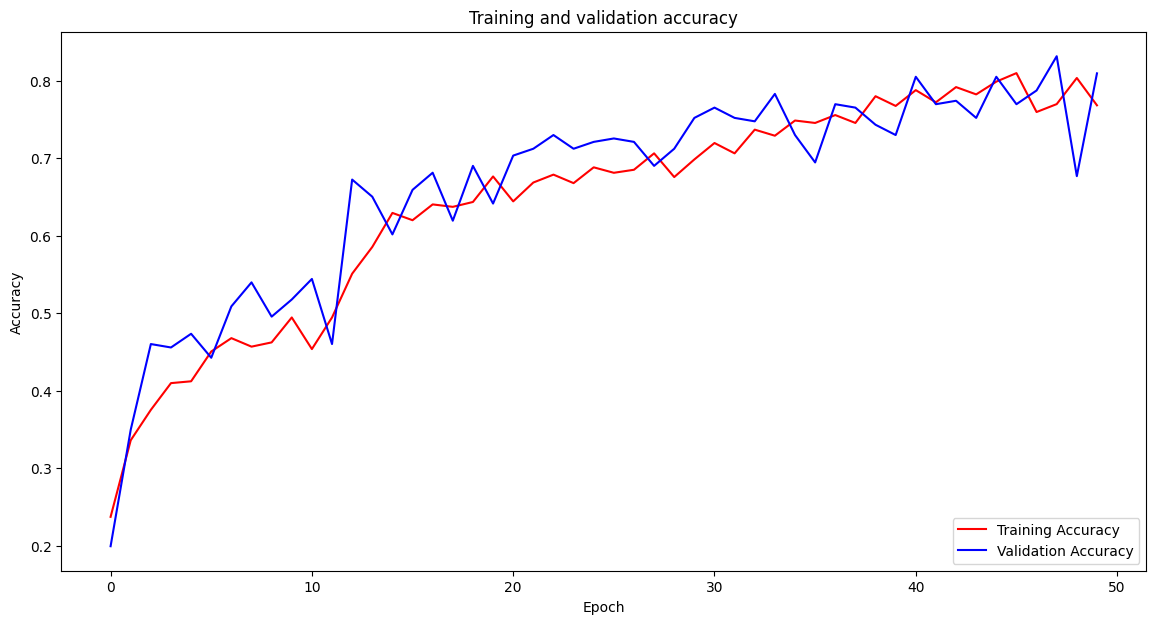

In [22]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

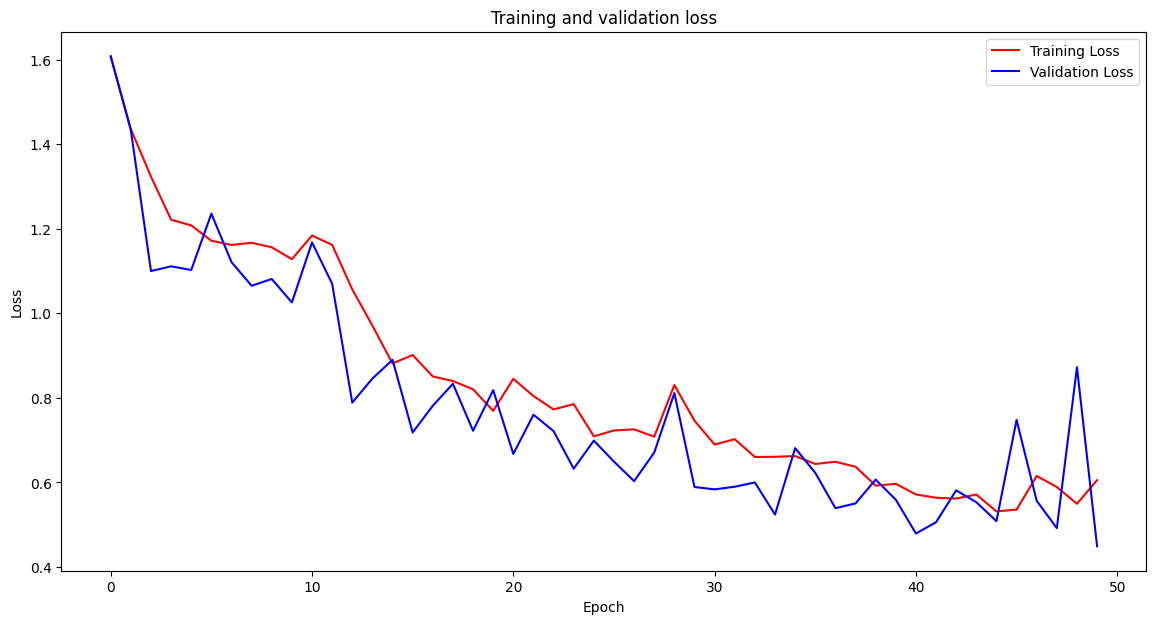

In [23]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [24]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

Step 4. Checking performance on Test Data (Out of the sample)

In [25]:
# Read Test Images Dir and their labels
test_images_dir = '/content/dataset/alien_test/'
test_df = pd.read_csv('/content/dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [26]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[1 0 3 3 1 1 1 0 1 0 4 3 1 1 2 2 2 2 2 2 3 3 3 4 4 4 4 4 4 4]


In [27]:
test_df = pd.read_csv('/content/dataset/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: labels, dtype: int64


In [28]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, normalize=True, sample_weight=None, labels=None)

In [29]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[1, 1, 0, 2, 0],
       [2, 6, 0, 1, 1],
       [0, 0, 6, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 7]])

In [30]:
train_dir = '/content/weather-data/train/'
classes = os.listdir(train_dir)

In [31]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

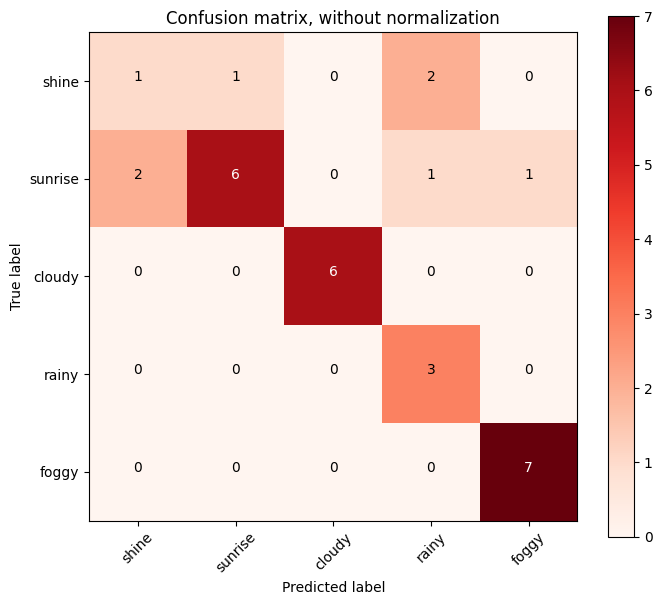

In [32]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Accuracy: 0.7666666666666667


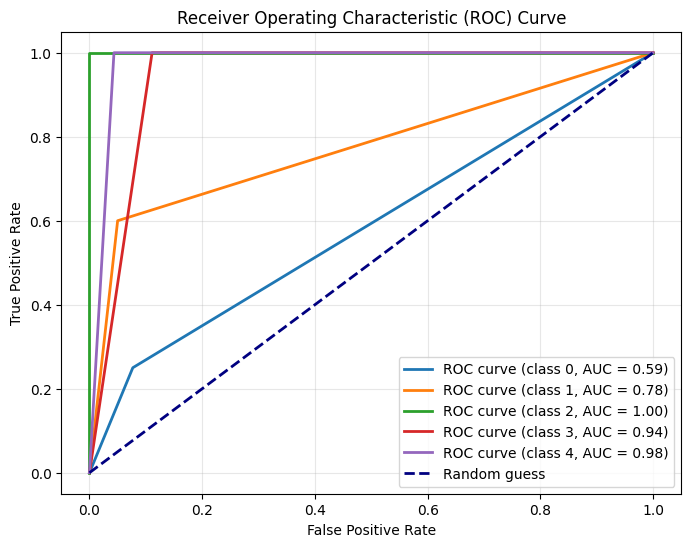

In [35]:
# Assuming test_preprocessed_images contains your preprocessed test images
y_pred = model.predict(test_preprocessed_images)

# Get predicted labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Now you can use y_true (true labels) and y_pred_labels (predicted labels) for evaluation metrics.

# For example, to calculate accuracy:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred_labels)
print(f"Accuracy: {accuracy}")

# To calculate the ROC curve and AUC:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multiclass ROC curve calculation
y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
y_pred_bin = label_binarize(y_pred_labels, classes=np.unique(y_true))

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_true_bin.shape[1]  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}, AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()